In [66]:
import os 
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'scripts'))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import utils

data_file = "superstore.csv"

PROJECT_DIR = os.path.dirname(os.getcwd())
DATA_DIR = os.path.join(PROJECT_DIR, 'data', 'csv', 'V2')

DATA_FILE = os.path.join(DATA_DIR, data_file)

df = pd.read_csv(DATA_FILE)

In [2]:
df.drop_duplicates(inplace=True)
df.drop(df[df['Size'] == '1,000+'].index, inplace=True)

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
#drop Size data with string that could not be converted to float
df.drop(df[df['Size'] == '1,000+'].index, inplace=True)
df['Size'] = df['Size'].str.replace('M', '000000').str.replace('k', '000').str.replace('Varies with device', 'NaN').astype(float)
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Cleaning Price column
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Handling date formats
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

# Cleaning Size column
# Assuming 'k' denotes kilobytes and 'M' denotes megabytes
df['Size'] = df['Size'].apply(lambda x: x * 1024 if 'k' in str(x) else x)

# Removing duplicates



<AxesSubplot:title={'center':'Number of Apps per Year'}>

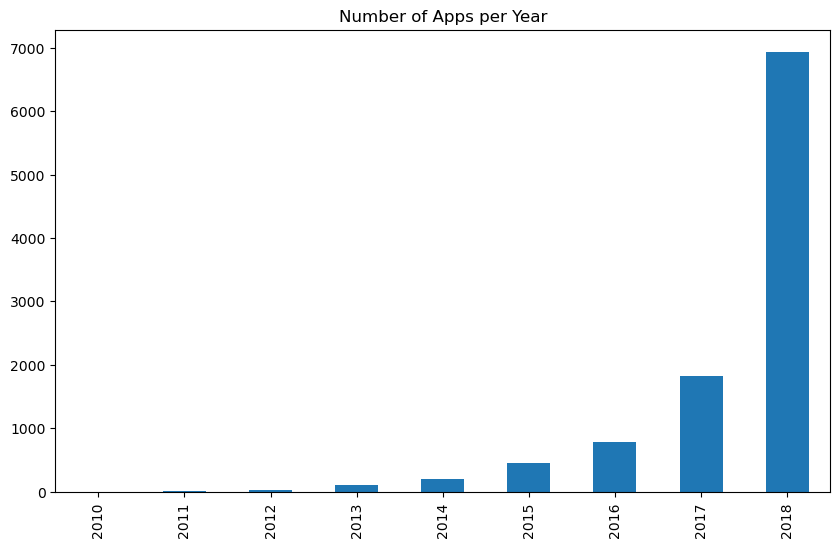

In [55]:
#group last updated by year

# df['Last Updated'].dt.quarter.value_counts().sort_index().plot(kind='bar', figsize=(10, 6), title='Number of Apps per Year')
df['Last Updated'].dt.year.value_counts().sort_index().plot(kind='bar', figsize=(10, 6), title='Number of Apps per Year')


In [4]:
df.dropna(inplace=True)

In [63]:
#do a linear model to predict the number of installs for the next 10 years
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

X = df[['Reviews', 'Size', 'Price']]
y = df['Installs']



# Assuming df is your DataFrame

best_score = float('-inf')  # Initialize with negative infinity
best_model = None


for _ in range(10):
    random_state = np.random.randint(1000)  # Generate a random state for each iteration
    np.random.seed(random_state)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    model = LinearRegression()
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    cv_scores = cross_val_score(model, X, y, cv=5)

    

    if score > best_score:
        best_random_state = _
        best_score = score
        best_model = model
        besc_cv_scores = cv_scores

print("cv Scores:", besc_cv_scores)
print("Promedio del puntaje:", besc_cv_scores.mean())
print("Random State:", best_random_state)
print("Best Score:", best_score)
print("Best Model:", best_model)

cv Scores: [0.52159209 0.24742687 0.26278711 0.50329676 0.05407625]
Promedio del puntaje: 0.3178358159607666
Random State: 1
Best Score: 0.4803271609616091
Best Model: LinearRegression()


In [64]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up


C:\Users\jgonzalezt\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


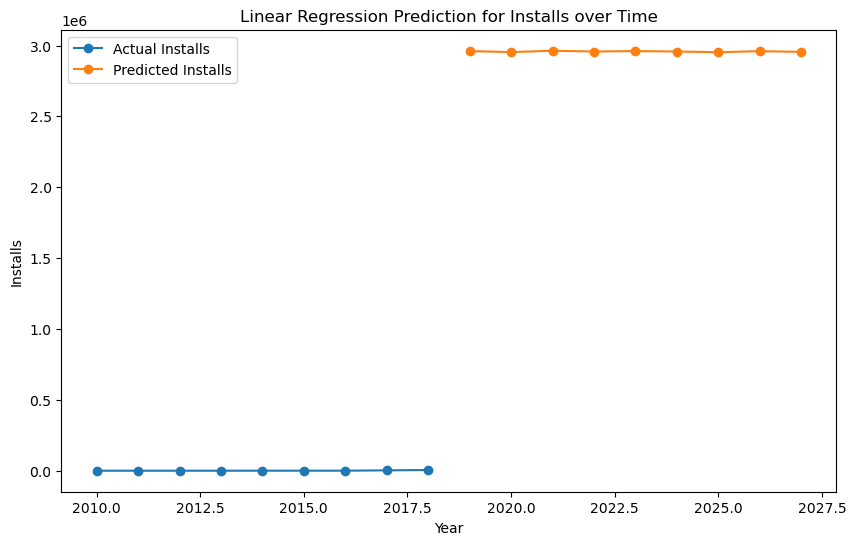

In [53]:
import matplotlib.pyplot as plt

# Assuming 'Year' is the time feature in your dataset
max_year = df['Last Updated'].dt.year.max()
future_years = np.arange(max_year + 1, max_year + 10).reshape(-1, 1)

# Assuming 'Reviews', 'Size', 'Price' are the features used in your model
future_data = np.random.rand(len(future_years), 3)  # Replace with your actual future data

# Predict the number of installs for the next 10 years
future_installs = best_model.predict(future_data)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Last Updated'].dt.year.sort_values(ascending=True).unique(), df['Price'].groupby(df['Last Updated'].dt.year).sum(), label='Actual Installs', marker='o')
plt.plot(future_years, future_installs, label='Predicted Installs', marker='o')
plt.xlabel('Year')
plt.ylabel('Installs')
plt.title('Linear Regression Prediction for Installs over Time')
plt.legend()
plt.show()


In [54]:
future_installs

array([2960645.761916  , 2953521.7217231 , 2963160.23467462,
       2957582.90831888, 2960439.43024393, 2957582.31902366,
       2952612.01192906, 2960026.53140968, 2954936.59478477])

In [56]:
future_data

array([[0.3528684 , 0.65169958, 0.26514389],
       [0.01038047, 0.5978182 , 0.89630721],
       [0.019891  , 0.62697338, 0.04176223],
       [0.04955919, 0.97630315, 0.53629314],
       [0.95471092, 0.49492242, 0.28424397],
       [0.59855122, 0.08269305, 0.53707862],
       [0.92580659, 0.79380748, 0.97819102],
       [0.84337062, 0.6070418 , 0.32070296],
       [0.70079265, 0.67959359, 0.77178962]])